In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('flight_data_final.csv')

In [4]:
data.head()

,days_left,time_taken,price,airline_Air India,airline_GO FIRST,airline_Indigo,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,...,to_Kolkata,to_Mumbai,class_business,class_economy,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,1,2.00,25612,True,False,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False
1,1,2.25,25612,True,False,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False
2,1,24.75,42220,True,False,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False
3,1,26.50,44450,True,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,False,True
4,1,6.67,46690,True,False,False,False,False,False,True,...,False,True,True,False,False,False,True,False,False,False


In [5]:
data.columns

Index(['days_left', 'time_taken', 'price', 'airline_Air India',
       'airline_GO FIRST', 'airline_Indigo', 'airline_Vistara',
       'from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'stop_one', 'stop_two_or_more',
       'stop_zero', 'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai', 'class_business', 'class_economy',
       'departure_time_Afternoon', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night'],
      dtype='object')

In [6]:
data.shape

(274713, 30)

In [7]:
X = data.drop(['price','time_taken'] , axis=1)

In [8]:
X.head()

,days_left,airline_Air India,airline_GO FIRST,airline_Indigo,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,...,to_Kolkata,to_Mumbai,class_business,class_economy,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,1,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
1,1,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
2,1,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
3,1,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
4,1,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False


In [9]:
y = data['price']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train = X_train.to_numpy(dtype='float32')
X_test = X_test.to_numpy(dtype='float32')

In [12]:
X_train[3]

array([44.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.], dtype=float32)

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(), 
    metrics=['mae']
)

In [39]:
model.fit(X_train,y_train, epochs=20 , validation_data=(X_test,y_test))

Epoch 1/20
5752/5752 [==============================] - 6s 1ms/step - loss: 413226016.0000 - mae: 15977.0303 - val_loss: 244479600.0000 - val_mae: 12716.1748
Epoch 2/20
5752/5752 [==============================] - 7s 1ms/step - loss: 169297472.0000 - mae: 10030.3652 - val_loss: 118629480.0000 - val_mae: 8211.4287
Epoch 3/20
5752/5752 [==============================] - 7s 1ms/step - loss: 96533584.0000 - mae: 7515.5986 - val_loss: 79815592.0000 - val_mae: 6920.5205
Epoch 4/20
5752/5752 [==============================] - 7s 1ms/step - loss: 71981008.0000 - mae: 6428.6479 - val_loss: 65206228.0000 - val_mae: 6097.1191
Epoch 5/20
5752/5752 [==============================] - 7s 1ms/step - loss: 62223892.0000 - mae: 5888.5552 - val_loss: 60070076.0000 - val_mae: 5867.6748
Epoch 6/20
5752/5752 [==============================] - 7s 1ms/step - loss: 57523648.0000 - mae: 5577.4043 - val_loss: 55527112.0000 - val_mae: 5452.4492
Epoch 7/20
5752/5752 [==============================] - 7s 1ms/step -

In [40]:
y_pred = model.predict(X_test)

2833/2833 [==============================] - 2s 635us/step


In [41]:
y_pred = y_pred.flatten()

<Axes: xlabel='price', ylabel='Count'>

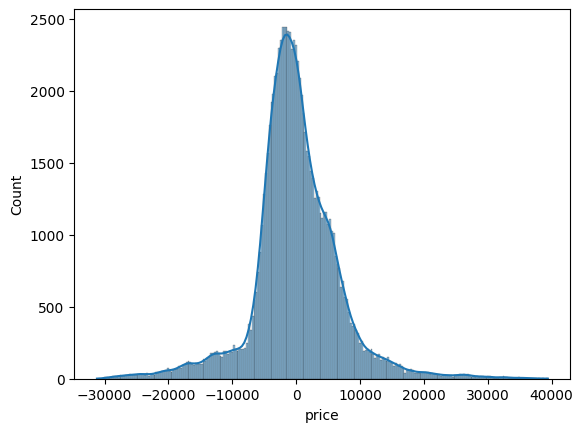

In [42]:
sns.histplot(data=(y_test-y_pred),kde=True)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

6953.897539676092

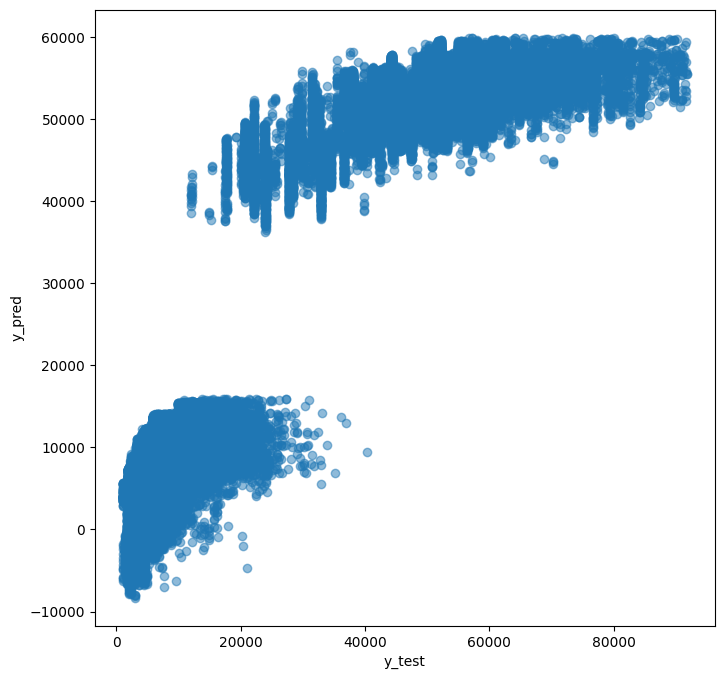

In [43]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {'n_estimators':[5,50,64,100] , "max_features": [2,3,4]}

In [46]:
model = RandomForestRegressor()

In [47]:
param_grid = {'n_estimators':[50,64,100] , "max_features": [2,3,4]}

In [48]:
grid  = GridSearchCV(model,param_grid , cv=5)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [50, 64, 100]})

In [50]:
y_pred = grid.predict(X_test)

<Axes: xlabel='price', ylabel='Count'>

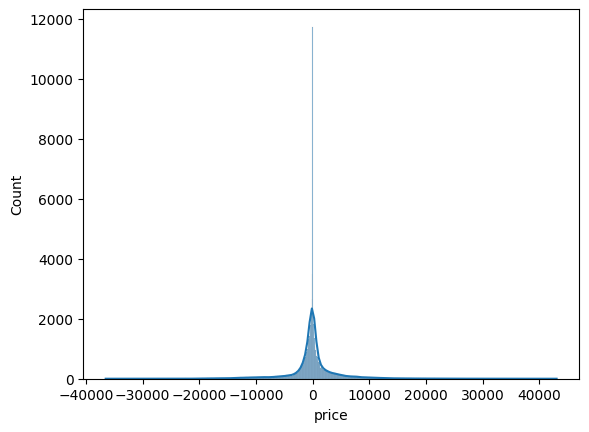

In [51]:
sns.histplot(data=(y_test-y_pred),kde=True)

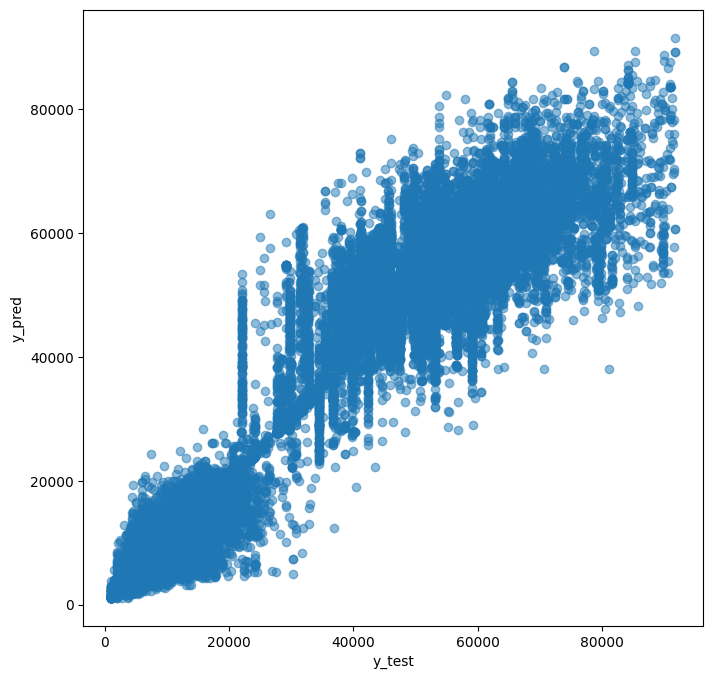

In [52]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
np.sqrt(mean_squared_error(y_test,y_pred))

4595.80836863147

In [55]:
grid.best_params_

{'max_features': 4, 'n_estimators': 100}

In [15]:
rf = RandomForestRegressor(max_features=4 , n_estimators=100)

In [16]:
rf.fit(X,y)

RandomForestRegressor(max_features=4)

In [17]:
import pickle
with open('flight_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [18]:
import joblib

# Assuming modelP is your trained model
joblib.dump(rf, 'flight_rf_model.joblib')


['flight_rf_model.joblib']